In [270]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [301]:
class AnalysisDataAndFitLinearRegression:

    def __init__(self):
        
        self.size = 8
        self.hashmap = [[] for _ in range(0, self.size)]
    
    def custom_hash(self,key):
        
        indexed_key = self.custom_hash(key)
        return indexed_key
    
    def insert_item(self, key, value):
        
        hash_key = self.custom_hash(key)
        key_exists = False
        bucket = self.hashmap[hash_key]
        for i, kv in enumerate(bucket):
            k ,v = kv
            if key == k:
                key_exists = True
        if key_exists:
            bucket[i] = ((key,value))
        else:
            bucket.append((key,value))
            
    def get_item(self,key):
        hash_key = self.custom_hash(key)
        bucket = self.hashmap[hash_key]
        for kv in bucket:
            k ,v = kv
            if key == k:
                return v
            else:
                raise KeyError('Key does not exist.')
                
            
    def analyse_and_fit_lrm(self, path):
        
        data = pd.read_csv(path)
        summary_dict = {}
        regression_dict = {}
        statistics = [data.loc[(data['Bathroom'] == 2) | (data['Bathroom'] == 4)], data['Tax'].describe()[1], data['Tax'].describe()[2], data['Tax'].describe()[3], data['Tax'].describe()[7]]
        data_frame = data.loc[data['Space']>800].sort_values(['Price'],ascending = False)
        
        summary_dict['statistics'] = statistics
        summary_dict['data_frame'] = data_frame
        
        model_parameters = {}
        price_prediction = {}
        
        return {
            'summary_dict': summary_dict,
            'regression_dict': regression_dict
        }

    def __listwise_deletion(self, data: pd.DataFrame):
        return data.dropna()

In [305]:
data = pd.read_csv('realest.csv')
d = AnalysisDataAndFitLinearRegression()
d.insert_item('key1', 'val 1')
print(d.get_item('key1'))

RecursionError: maximum recursion depth exceeded

In [273]:
data_frame = data.loc[data['Space']>800].sort_values(['Price'],ascending = False)
data_frame

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
114,90.0,8.0,2293.0,12.0,50.0,1181.0,3.0,2.0,0.0
140,88.0,7.0,2277.0,12.0,50.0,1248.0,3.0,2.0,0.0
36,88.0,8.0,2278.0,12.0,50.0,1183.0,3.0,2.0,0.0
88,88.0,8.0,2228.0,12.0,50.0,1208.0,3.0,2.0,0.0
62,85.0,7.0,2295.0,12.0,50.0,1233.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...
45,35.0,5.0,1142.0,7.0,25.0,543.0,1.5,0.0,0.0
19,35.0,4.0,1137.0,7.0,25.0,561.0,1.5,0.0,0.0
97,34.0,4.0,1087.0,7.0,25.0,584.0,1.5,0.0,0.0
71,34.0,4.0,1095.0,7.0,25.0,530.0,1.5,0.0,0.0


In [274]:
statistics = [data.loc[(data['Bathroom'] == 2) | (data['Bathroom'] == 4)], data['Tax'].describe()[1], data['Tax'].describe()[2], data['Tax'].describe()[3], data['Tax'].describe()[7]]
data_frame = data.loc[data['Space']>800].sort_values(['Price'],ascending = False)

summary_dict = {'statistics' : statistics,
                'data_frame' : data_frame
               }

print(summary_dict)

{'statistics': [     Price  Bedroom   Space  Room   Lot    Tax  Bathroom  Garage  Condition
5     44.0      4.0   897.0   7.0  25.0  960.0       2.0     1.0        0.0
16    62.0      3.0  1126.0   7.0  30.0  734.0       2.0     0.0        1.0
17    64.0      4.0  1226.0   8.0  37.0    NaN       2.0     2.0        0.0
23    46.0      2.0   696.0   4.0  30.0  440.0       2.0     1.0        0.0
25    65.0      3.0  1023.0   7.0  30.0  900.0       2.0     1.0        0.0
31    46.0      3.0   855.0   7.0  25.0  948.0       2.0     1.0        0.0
42    64.0      2.0  1104.0   7.0  30.0  722.0       2.0     0.0        1.0
43    65.0      4.0  1250.0   8.0  37.0  554.0       2.0     2.0        0.0
49    45.0      2.0     NaN   4.0  30.0  470.0       2.0     1.0        0.0
51    66.0      3.0  1053.0   7.0  30.0  867.0       2.0     1.0        0.0
57    44.0      4.0   880.0   7.0  25.0  965.0       2.0     1.0        0.0
68    65.0      2.0     NaN   7.0  30.0  719.0       2.0     0.0        

In [266]:
x1 = np.array([53,55, 56, 58, 64, 44, 49,70, 72, 82, 85,45, 47, 49, 56, 60, 62, 64,
 66, 35, 38, 43, 46, 46, 50, 65, 54, 58, 58, 61, 62, 46, 49, 70, 72, 81,
 88, 45, 47, 47, 55, 61, 64, 65 ,64, 35, 36, 42, 48, 45, 53, 66, 50, 57,
 59, 56, 65, 44, 51, 70, 70, 84, 85, 45, 47, 52, 55, 61, 65, 66, 69, 34,
 39, 44, 43, 43, 53, 63, 54, 52, 56, 55, 66, 41, 51, 71, 73, 80, 88, 47,
 50, 52, 58, 59, 62, 61, 67, 34, 36, 46, 46, 47, 51, 65, 55, 61, 58, 64,
 63, 45, 49, 73, 70, 81,90, 44, 44, 44, 57, 63, 65, 68,63, 37, 39,39,
 49, 44, 50, 63,49, 59, 60, 55, 67, 41, 48, 70, 70 ,85, 88, 42 ,45, 52,
 55, 59, 64, 66, 69, 32, 42, 42, 44, 43, 53, 62]).reshape((-1,1))
    
y_bedroom = data.iloc[:,1]

y1=np.array([ 2,  2,  3,  3,  3,  4,  5,  3,  4,  4,  8,  2,  3,  4,  4,  2,  3,  4,
  2,  4,  3,  3,  2,  2,  2,  3,  1,  1,  2,  3,  3,  3,  4,  3,  5,  5,
  8,  3,  3,  3,  5,  1,  2,  4,  2,  5,  4,  2,  3,  2,  2,  3,  2,  3,
  2,  3,  2,  4,  4,  2,  3,  3,  7,  3,  4,  5,  3,  3,  2,  4,  1,  4,
  2,  3,  3,  2,  3,  4,  2,  2,  3,  3,  3,  4,  5,  3,  4,  4,  8,  2,
  3,  4,  4,  2,  3,  4,  2,  4,  3,  3,  2,  2,  2,  3,  1,  1,  2,  3,
  3,  3,  4,  3,  5,  5,  8,  3,  3,  3,  5,  1,  2,  4,  2,  5,  4,  2,
  3,  2,  2,  3,  2,  3,  2,  3,  2,  4,  4,  2,  3,  3,  7,  3,  4,  5,
  3,  3,  2,  4,  1,  4,  2,  3,  3,  2,  3,  4]).reshape((-1,1))

y2 = np.zeros(len(y_space))


    
print(y_space)

y_space = data.iloc[:,2]
y_room= data.iloc[:,3]
y_lot = data.iloc[:,4]
y_tax = data.iloc[:,5]
y_bathroom = data.iloc[:,6]
y_garage = data.iloc[:,7]
y_condition = data.iloc[:,8]


model1 = LinearRegression().fit(x1, y1)
model2 = LinearRegression().fit(x1, y1)

0       967.0
1       815.0
2       900.0
3      1007.0
4      1100.0
        ...  
152     820.0
153     593.0
154     716.0
155     951.0
156       NaN
Name: Space, Length: 157, dtype: float64


In [222]:
print('intercept:', model1.intercept_)

intercept: [1.37832314]


In [223]:
print('slope:', model1.coef_)

slope: [[0.03166647]]


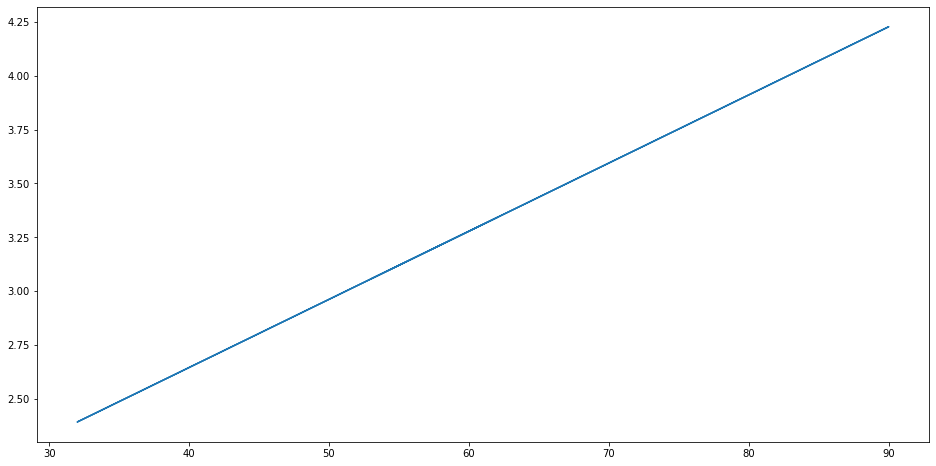

In [230]:
y_pred = model1.predict(x1)
